In [1]:
import pandas as pd
import seaborn as sns

pd.set_option("display.max_columns", 200)
pd.set_option("display.max_row", 160)
pd.set_option('max_colwidth', 200)

In [2]:
a = pd.read_csv('accepted.csv')
a.head(3)

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=68407277,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.0,0.0,4421.723917,4421.72,3600.0,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=68355089,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.0,0.0,25679.660000,25679.66,24700.0,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,246

In [3]:
a.shape

(2260701, 151)

In [4]:
#1. Remove all obserations with No Funded Amount First, How many:
print(len(a[a.funded_amnt.isnull()]))

33


In [5]:
drop = a[a.funded_amnt.isnull()].index
a.drop(drop, axis=0, inplace=True)
a.shape

(2260668, 151)

In [6]:
#No more NaN funded amounts: 
a[a.funded_amnt.isna()].shape

(0, 151)

In [7]:
#2. How many value types for "loan_status"?
print(a.loan_status.value_counts(dropna=False).sum()) #Total matches

a.loan_status.value_counts(dropna=False)

2260668


Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

In [8]:
#Create new column and map Charged Off = 0, Fully Paid = 1
a['loan_status_bin'] = a['loan_status'].map({'Charged Off':0, 'Fully Paid':1})

In [9]:
#Quick Check:
a[['loan_status', 'loan_status_bin']].sample(10)

,loan_status,loan_status_bin
2068548,Current,NaN
1639510,Fully Paid,1.0
2005462,Fully Paid,1.0
751818,Current,NaN
555030,Current,NaN
1495353,Current,NaN
1544536,Current,NaN
1930827,Fully Paid,1.0
1958052,Charged Off,0.0
197574,Fully Paid,1.0


In [10]:
#Drop all loans which do not classify as "Fully Paid" or "Charged Off":
drop2 = a[a.loan_status_bin.isnull()].index
a.drop(drop2, axis=0, inplace=True)
a.shape

(1345310, 152)

In [11]:
a.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,loan_status_bin
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=68407277,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.0,0.0,4421.723917,4421.72,3600.0,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=68355089,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.0,0.0,25679.660000,25679.66,24700.0,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0

In [12]:
#3. Taking all loans with interest rate greater than or equal to 20%: 
a = a[a.int_rate >= 20].reset_index(drop=True)
a.shape

(110144, 152)

In [13]:
#4. Check breakdown by grade type and keep only D:
a.grade.value_counts()

E    55735
F    31483
D    13824
G     9102
Name: grade, dtype: int64

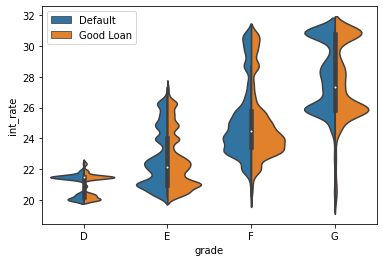

In [14]:
g = sns.violinplot(data=a, y='int_rate', x='grade', split=True, hue='loan_status_bin',
               order=['D', 'E', 'F', 'G'])

g.legend(handles=g.legend_.legendHandles, labels=['Default', 'Good Loan']);

In [15]:
a[['grade', 'loan_status_bin']].groupby(['grade']).describe()

loan_status_bin                                             
                count      mean       std  min  25%  50%  75%  max
grade                                                             
D             13824.0  0.669560  0.470389  0.0  0.0  1.0  1.0  1.0
E             55735.0  0.617673  0.485960  0.0  0.0  1.0  1.0  1.0
F             31483.0  0.544643  0.498011  0.0  0.0  1.0  1.0  1.0
G              9102.0  0.500000  0.500027  0.0  0.0  0.5  1.0  1.0

In [16]:
a = a[(a.grade=='D')]
a.shape

(13824, 152)

In [17]:
#4b. Check Loan Amount vs Defaults.....Loans less than 10,000 do significantly better! 74% 

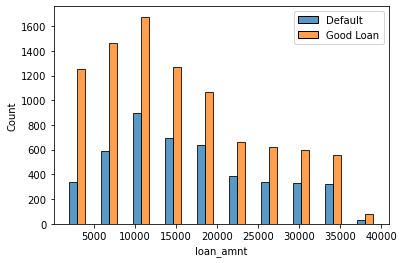

In [18]:
g = sns.histplot(data=a, x='loan_amnt', hue='loan_status_bin', multiple='dodge', bins=10, shrink=0.5)

g.legend(handles=g.legend_.legendHandles, labels=['Default', 'Good Loan']);

In [19]:
a[['loan_amnt', 'loan_status_bin']].describe()

,loan_amnt,loan_status_bin
count,13824.000000,13824.000000
mean,15872.849754,0.669560
std,9583.300890,0.470389
min,1000.000000,0.000000
25%,8000.000000,0.000000
50%,14400.000000,1.000000
75%,22500.000000,1.000000
max,40000.000000,1.000000


In [20]:
a = a[a.loan_amnt < 10000]
a.shape

(3970, 152)

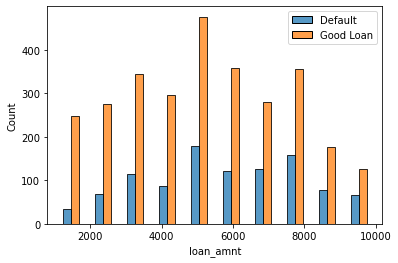

In [21]:
g = sns.histplot(data=a, x='loan_amnt', hue='loan_status_bin', multiple='dodge', bins=10, shrink=.5)

g.legend(handles=g.legend_.legendHandles, labels=['Default', 'Good Loan']);

In [22]:
a[['loan_amnt', 'loan_status_bin']].describe()

,loan_amnt,loan_status_bin
count,3970.000000,3970.000000
mean,5343.734257,0.739547
std,2329.009790,0.438937
min,1000.000000,0.000000
25%,3550.000000,0.000000
50%,5000.000000,1.000000
75%,7200.000000,1.000000
max,9975.000000,1.000000


In [23]:
#4c. Check Income Amount vs Defaults....income above 60,000 (slightly above mean) yields 81%

In [24]:
a[['annual_inc', 'loan_status_bin']].describe()

,annual_inc,loan_status_bin
count,3.970000e+03,3970.000000
mean,5.873298e+04,0.739547
std,1.054978e+05,0.438937
min,0.000000e+00,0.000000
25%,3.400000e+04,0.000000
50%,4.972600e+04,1.000000
75%,7.000000e+04,1.000000
max,4.680804e+06,1.000000


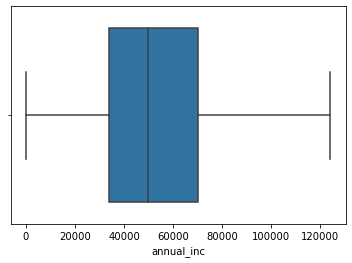

In [25]:
sns.boxplot(data=a, x='annual_inc', showfliers=False);

In [26]:
a = a[a.annual_inc > 60000]
a[['loan_status_bin']].describe()

,loan_status_bin
count,1323.000000
mean,0.811791
std,0.391026
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [27]:
#4d. Check DTI vs Defaults...dti less than 15 yields 86.7%

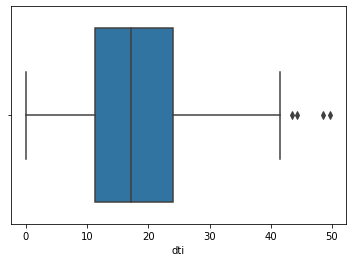

In [28]:
sns.boxplot(data=a, x='dti');

In [29]:
a = a[a.dti<15]
a[['loan_status_bin']].describe()

,loan_status_bin
count,551.000000
mean,0.849365
std,0.358018
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [30]:
## Keep verification....see what happens: 

#5. Drop all observations where income is not verified: 

a['verification_status'].value_counts()

Not Verified       206
Source Verified    201
Verified           144
Name: verification_status, dtype: int64

In [31]:
#a = a[a['verification_status']!='Not Verified'].reset_index(drop=True)
a.shape

(551, 152)

In [32]:
#4. Drop member_id (all NaN), funded_amnt, funded_amnt_inv. Keep loan_amnt (we know that before investment): 
a.drop(['member_id', 'funded_amnt', 'funded_amnt_inv'], axis=1, inplace=True)
a.shape

(551, 149)

In [33]:
#5. Remove all columns related to "hardship" status. We won't know this at get go. 

a.drop(['hardship_flag', 'hardship_last_payment_amount', 'hardship_payoff_balance_amount',
        'hardship_loan_status', 'hardship_dpd', 'hardship_end_date', 'hardship_start_date',
        'hardship_amount', 'hardship_status', 'hardship_reason', 'hardship_type', 
        'hardship_length'], axis=1, inplace=True)
a.shape

(551, 137)

In [34]:
#6. Remove 'Policy Code' Column. All Policy Codes here are '1'. 
a.policy_code.value_counts()

1.0    551
Name: policy_code, dtype: int64

In [35]:
a.drop(['policy_code'], axis=1, inplace=True)
a.shape

(551, 136)

In [36]:
#7. Remove all observations with "Joint Applications". 
a.application_type.value_counts()

Individual    539
Joint App      12
Name: application_type, dtype: int64

In [37]:
a = a[a.application_type == 'Individual']
a.shape

(539, 136)

In [38]:
#8. Remove all info regarding second applicant or "Joint Applications".

In [39]:
a.drop(['sec_app_mths_since_last_major_derog', 'sec_app_collections_12_mths_ex_med',
        'sec_app_chargeoff_within_12_mths', 'sec_app_num_rev_accts', 'sec_app_open_act_il',
        'sec_app_revol_util', 'sec_app_revol_util', 'sec_app_open_acc', 'sec_app_mort_acc',
        'sec_app_inq_last_6mths', 'sec_app_earliest_cr_line', 'sec_app_fico_range_low',
        'dti_joint', 'sec_app_fico_range_high', 'verification_status_joint', 'revol_bal_joint', 
        'annual_inc_joint'], axis=1, inplace=True)

a.shape

(539, 120)

In [40]:
#9. Remove 'next_pymnt_d' because all loans are "Paid Off" or "Defaulted", so they are all "NaN"
a.next_pymnt_d.isna().sum()

539

In [41]:
a.drop(['next_pymnt_d'], axis=1, inplace=True)
a.shape

(539, 119)

In [42]:
#10. Drop 'url'. It will not provide any info. 
a.drop(['url'], axis=1, inplace=True)
a.shape

(539, 118)

In [43]:
#11. Drop 'zip_code'. It's not even complete. Can always use addr_state if location is a factor. 
a.drop(['zip_code'], axis=1, inplace=True)
a.shape

(539, 117)

In [44]:
#12. "out_prncp" and "out_prncp_inv" are 0 because there is no more "outstanding" amounts. Drop them. 
print(a.out_prncp.value_counts())
print(a.out_prncp_inv.value_counts())

0.0    539
Name: out_prncp, dtype: int64
0.0    539
Name: out_prncp_inv, dtype: int64


In [45]:
a.drop(['out_prncp', 'out_prncp_inv'], axis=1, inplace=True)
a.shape

(539, 115)

In [46]:
#13. Remove 'id' (irrevelvant) but keep 'issue_d' for feature engineering.
a.drop(['id'], axis=1, inplace=True)
a.shape

(539, 114)

In [47]:
#14. Drop 'pymnt_plan'. They are all 'n'. 
a.pymnt_plan.value_counts()

n    539
Name: pymnt_plan, dtype: int64

In [48]:
a.drop(['pymnt_plan'], axis=1, inplace=True)
a.shape

(539, 113)

In [49]:
#15. Drop 'last_fico_range_high' and 'last_fico_range_low'. We only rely on initial fico scores. 
a.drop(['last_fico_range_high', 'last_fico_range_low'], axis=1, inplace=True)
a.shape

(539, 111)

In [50]:
#16. Taking all loans with interest rate greater than or equal to 20%: 
a = a[a.int_rate >= 20].reset_index(drop=True)
a.shape

(539, 111)

In [51]:
#Partial Set of Features, Work in Progress......

In [52]:
#16. Let's rearrange order of columns to enhance our view: 
sub = a[['issue_d', 'loan_amnt', 'annual_inc', 'dti', 'fico_range_low', 'fico_range_high',
   'term', 'int_rate', 'installment', 'initial_list_status',
   'grade', 'sub_grade', 'emp_length', 'home_ownership',
   'earliest_cr_line', 'open_acc', 'total_acc',
   'revol_bal', 'revol_util',
   'inq_last_6mths',
   
   'delinq_2yrs', 'mths_since_last_delinq','acc_now_delinq',
   'collections_12_mths_ex_med','tot_coll_amt', 'tot_cur_bal',
   'pub_rec', 'mths_since_last_record',
   
   
   'purpose', 'title', 'addr_state', 'loan_status', 
   'loan_status_bin', 
   'application_type',
   'verification_status','emp_title',
   'total_pymnt', 'total_pymnt_inv',
   'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
   'recoveries', 'collection_recovery_fee',
   'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 
   'desc']]

sub.head(2)

,issue_d,loan_amnt,annual_inc,dti,fico_range_low,fico_range_high,term,int_rate,installment,initial_list_status,grade,sub_grade,emp_length,home_ownership,earliest_cr_line,open_acc,total_acc,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,mths_since_last_delinq,acc_now_delinq,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,pub_rec,mths_since_last_record,purpose,title,addr_state,loan_status,loan_status_bin,application_type,verification_status,emp_title,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,desc
0,Mar-2018,1500.0,70000.0,12.67,670.0,674.0,36 months,20.39,56.05,w,D,D4,6 years,RENT,Oct-2003,7.0,22.0,9245.0,60.8,0.0,0.0,33.0,0.0,0.0,0.0,27381.0,0.0,NaN,other,Other,UT,Charged Off,0.0,Individual,Not Verified,Fire Tech 3,552.940000,552.94,30.56,22.09,0.0,500.29,90.0522,May-2018,56.05,Mar-2019,NaN
1,Mar-2018,5000.0,110000.0,9.42,665.0,669.0,36 months,21.85,190.57,w,D,D5,< 1 year,RENT,Apr-1999,11.0,23.0,5117.0,33.7,1.0,0.0,47.0,0.0,0.0,0.0,27806.0,3.0,26.0,home_improvement,Home improvement,CA,Fully Paid,1.0,Individual,Source Verified,Director of IT,5057.659167,5057.66,5000.00,57.66,0.0,0.00,0.0000,Apr-2018,5063.73,Jan-2019,NaN


In [54]:
sub.shape

(539, 47)

In [55]:
sub.isna().mean().sort_values()

issue_d                       0.000000
tot_coll_amt                  0.000000
tot_cur_bal                   0.000000
pub_rec                       0.000000
purpose                       0.000000
addr_state                    0.000000
loan_status                   0.000000
loan_status_bin               0.000000
application_type              0.000000
verification_status           0.000000
total_pymnt                   0.000000
total_pymnt_inv               0.000000
total_rec_prncp               0.000000
total_rec_int                 0.000000
total_rec_late_fee            0.000000
recoveries                    0.000000
collection_recovery_fee       0.000000
last_pymnt_amnt               0.000000
last_credit_pull_d            0.000000
acc_now_delinq                0.000000
collections_12_mths_ex_med    0.000000
grade                         0.000000
dti                           0.000000
fico_range_low                0.000000
fico_range_high               0.000000
term                     

In [56]:
#Carve out features from 'sub' which you think are most important:

imp_sub = sub[['issue_d', 'loan_amnt', 'annual_inc', 'dti', 'fico_range_low', 'fico_range_high',
   'term', 'int_rate', 'installment', 'initial_list_status',
   'grade', 'sub_grade', 'emp_length', 'home_ownership',
   'earliest_cr_line', 'open_acc', 'total_acc',
   'revol_bal', 'revol_util',
   'inq_last_6mths', 'verification_status',
   
   'delinq_2yrs', 'mths_since_last_delinq','acc_now_delinq',
   'collections_12_mths_ex_med','tot_coll_amt', 'tot_cur_bal',
   'pub_rec', 'mths_since_last_record',
   
   
   'purpose', 'title', 'loan_status', 
   'loan_status_bin']] 

In [57]:
imp_sub.shape

(539, 33)

In [58]:
imp_sub.head(2)

,issue_d,loan_amnt,annual_inc,dti,fico_range_low,fico_range_high,term,int_rate,installment,initial_list_status,grade,sub_grade,emp_length,home_ownership,earliest_cr_line,open_acc,total_acc,revol_bal,revol_util,inq_last_6mths,verification_status,delinq_2yrs,mths_since_last_delinq,acc_now_delinq,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,pub_rec,mths_since_last_record,purpose,title,loan_status,loan_status_bin
0,Mar-2018,1500.0,70000.0,12.67,670.0,674.0,36 months,20.39,56.05,w,D,D4,6 years,RENT,Oct-2003,7.0,22.0,9245.0,60.8,0.0,Not Verified,0.0,33.0,0.0,0.0,0.0,27381.0,0.0,NaN,other,Other,Charged Off,0.0
1,Mar-2018,5000.0,110000.0,9.42,665.0,669.0,36 months,21.85,190.57,w,D,D5,< 1 year,RENT,Apr-1999,11.0,23.0,5117.0,33.7,1.0,Source Verified,0.0,47.0,0.0,0.0,0.0,27806.0,3.0,26.0,home_improvement,Home improvement,Fully Paid,1.0


In [59]:
imp_sub.isna().sum().sort_values()

issue_d                         0
purpose                         0
pub_rec                         0
tot_cur_bal                     0
tot_coll_amt                    0
collections_12_mths_ex_med      0
acc_now_delinq                  0
delinq_2yrs                     0
verification_status             0
inq_last_6mths                  0
revol_util                      0
revol_bal                       0
loan_status                     0
open_acc                        0
total_acc                       0
home_ownership                  0
loan_amnt                       0
annual_inc                      0
dti                             0
fico_range_low                  0
fico_range_high                 0
earliest_cr_line                0
term                            0
int_rate                        0
installment                     0
initial_list_status             0
grade                           0
sub_grade                       0
loan_status_bin                 0
title         

In [60]:
#Let's add emp_length to the mix. Impute NaN with "None" string for time being: 

In [61]:
imp_sub['emp_length'].isna().sum()

9

In [62]:
imp_sub['emp_length'].replace(np.nan, "None", inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [63]:
imp_sub['emp_length'].isna().sum()

0

In [64]:
imp_sub.isna().sum().sort_values()

issue_d                         0
purpose                         0
pub_rec                         0
tot_cur_bal                     0
tot_coll_amt                    0
collections_12_mths_ex_med      0
acc_now_delinq                  0
delinq_2yrs                     0
verification_status             0
inq_last_6mths                  0
revol_util                      0
revol_bal                       0
loan_status                     0
open_acc                        0
total_acc                       0
home_ownership                  0
loan_amnt                       0
annual_inc                      0
dti                             0
fico_range_low                  0
fico_range_high                 0
earliest_cr_line                0
term                            0
int_rate                        0
installment                     0
initial_list_status             0
grade                           0
sub_grade                       0
emp_length                      0
loan_status_bi

In [69]:
#Let's take a closer look at "mths_since_last_delinq":
imp_sub.mths_since_last_delinq.value_counts(dropna=False)

NaN     190
12.0     13
19.0     12
33.0     10
20.0     10
24.0     10
18.0     10
22.0     10
10.0     10
16.0      9
9.0       9
5.0       8
37.0      8
13.0      8
21.0      8
44.0      8
17.0      8
42.0      7
25.0      7
34.0      7
7.0       7
6.0       7
45.0      6
32.0      6
29.0      6
28.0      5
47.0      5
31.0      5
15.0      5
36.0      5
11.0      5
53.0      5
41.0      4
69.0      4
27.0      4
4.0       4
40.0      4
26.0      4
35.0      4
3.0       4
65.0      3
2.0       3
80.0      3
23.0      3
51.0      3
30.0      3
52.0      3
38.0      3
14.0      3
8.0       3
43.0      2
61.0      2
1.0       2
56.0      2
63.0      2
64.0      2
79.0      2
73.0      2
75.0      2
67.0      2
50.0      2
74.0      2
57.0      2
68.0      2
72.0      2
55.0      2
54.0      2
60.0      2
49.0      2
39.0      2
46.0      2
66.0      1
62.0      1
48.0      1
70.0      1
77.0      1
59.0      1
Name: mths_since_last_delinq, dtype: int64

In [73]:
imp_sub[imp_sub.mths_since_last_delinq.isna()][['loan_status_bin']].describe()

,loan_status_bin
count,190.000000
mean,0.868421
std,0.338926
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [77]:
#Because 86% of all NaN values for "last_delinq" have been paid off, lets impute with "0". 
imp_sub['mths_since_last_delinq'] = imp_sub['mths_since_last_delinq'].replace(np.nan, 0)

/var/folders/kl/4xt5tydd0xb8yvwkgnx2mnc00000gn/T/ipykernel_36908/1327171406.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imp_sub['mths_since_last_delinq'] = imp_sub['mths_since_last_delinq'].replace(np.nan, 0)


In [78]:
imp_sub.isna().sum().sort_values()

issue_d                         0
purpose                         0
pub_rec                         0
tot_cur_bal                     0
tot_coll_amt                    0
collections_12_mths_ex_med      0
acc_now_delinq                  0
mths_since_last_delinq          0
delinq_2yrs                     0
verification_status             0
inq_last_6mths                  0
revol_util                      0
revol_bal                       0
loan_status                     0
open_acc                        0
total_acc                       0
home_ownership                  0
loan_amnt                       0
annual_inc                      0
dti                             0
fico_range_low                  0
earliest_cr_line                0
term                            0
fico_range_high                 0
installment                     0
initial_list_status             0
grade                           0
sub_grade                       0
emp_length                      0
int_rate      

In [79]:
#For the time being, drop all other features with NAs....we don't know which ones are important.
#We also don't know what is the best way to "impute".
No_NA = imp_sub.dropna(axis=1)
No_NA

,issue_d,loan_amnt,annual_inc,dti,fico_range_low,fico_range_high,term,int_rate,installment,initial_list_status,grade,sub_grade,emp_length,home_ownership,earliest_cr_line,open_acc,total_acc,revol_bal,revol_util,inq_last_6mths,verification_status,delinq_2yrs,mths_since_last_delinq,acc_now_delinq,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,pub_rec,purpose,loan_status,loan_status_bin
0,Mar-2018,1500.0,70000.0,12.67,670.0,674.0,36 months,20.39,56.05,w,D,D4,6 years,RENT,Oct-2003,7.0,22.0,9245.0,60.8,0.0,Not Verified,0.0,33.0,0.0,0.0,0.0,27381.0,0.0,other,Charged Off,0.0
1,Mar-2018,5000.0,110000.0,9.42,665.0,669.0,36 months,21.85,190.57,w,D,D5,< 1 year,RENT,Apr-1999,11.0,23.0,5117.0,33.7,1.0,Source Verified,0.0,47.0,0.0,0.0,0.0,27806.0,3.0,home_improvement,Fully Paid,1.0
2,Mar-2018,3000.0,181000.0,11.89,670.0,674.0,36 months,21.85,114.34,w,D,D5,5 years,OWN,Dec-1983,6.0,10.0,21371.0,101.3,0.0,Verified,0.0,74.0,0.0,0.0,0.0,58105.0,0.0,other,Charged Off,0.0
3,Mar-2018,5000.0,120000.0,12.09,680.0,684.0,36 months,21.85,190.57,f,D,D5,5 years,MORTGAGE,Sep-2007,17.0,30.0,31094.0,67.3,0.0,Source Verified,0.0,0,0.0,0.0,0.0,279213.0,0.0,medical,Charged Off,0.0
4,Mar-2018,4800.0,63440.0,13.69,670.0,674.0,36 months,21.85,182.95,w,D,D5,< 1 year,OWN,Oct-2003,17.0,44.0,5359.0,34.6,2.0,Verified,0.0,64.0,0.0,0.0,1079.0,133355.0,0.0,debt_consolidation,Fully Paid,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,Oct-2016,5300.0,155000.0,13.37,675.0,679.0,36 months,21.49,201.02,f,D,D5,< 1 year,MORTGAGE,Feb-1994,5.0,33.0,3394.0,97.0,1.0,Source Verified,1.0,22.0,0.0,0.0,0.0,19539.0,0.0,debt_consolidation,Fully Paid,1.0
535,Oct-2016,7200.0,85000.0,0.35,780.0,784.0,36 months,21.49,273.08,f,D,D5,5 years,MORTGAGE,Jan-2009,2.0,2.0,354.0,5.1,0.0,Source Verified,0.0,0,0.0,0.0,0.0,354.0,0.0,major_purchase,Fully Paid,1.0
536,Oct-2016,5000.0,85000.0,2.53,660.0,664.0,36 months,21.49,189.64,f,D,D5,8 years,RENT,Nov-2003,4.0,13.0,5507.0,26.9,2.0,Verified,0.0,0,0.0,0.0,140.0,7492.0,1.0,debt_consolidation,Fully Paid,1.0
537,Oct-2016,3200.0,78500.0,12.09,665.0,669.0,36 months,21.49,121.37,f,D,D5,5 years,RENT,Jun-2004,8.0,22.0,2674.0,78.6,0.0,Verified,0.0,33.0,0.0,0.0,0.0,22633.0,0.0,debt_consolidation,Fully Paid,1.0


In [80]:
#We now have 31 features (includes target as well)
No_NA.shape

(539, 31)

In [81]:
#Cross check that dataframe in use has no more Null values:
No_NA.isna().sum().sum()

0

In [82]:
data = No_NA.copy()

In [83]:
#Data Types of Remaining Features: 
data.dtypes

issue_d                        object
loan_amnt                     float64
annual_inc                    float64
dti                           float64
fico_range_low                float64
fico_range_high               float64
term                           object
int_rate                      float64
installment                   float64
initial_list_status            object
grade                          object
sub_grade                      object
emp_length                     object
home_ownership                 object
earliest_cr_line               object
open_acc                      float64
total_acc                     float64
revol_bal                     float64
revol_util                    float64
inq_last_6mths                float64
verification_status            object
delinq_2yrs                   float64
mths_since_last_delinq         object
acc_now_delinq                float64
collections_12_mths_ex_med    float64
tot_coll_amt                  float64
tot_cur_bal 

In [84]:
#Return unique values of categorical columns:
{column: list(data[column].unique()) for column in data.columns if data.dtypes[column]=='object'}

{'issue_d': ['Mar-2018',
  'Feb-2018',
  'Jan-2018',
  'Sep-2017',
  'Aug-2017',
  'Jul-2017',
  'Jun-2016',
  'Sep-2018',
  'Aug-2018',
  'Jul-2018',
  'Jun-2017',
  'May-2017',
  'Dec-2018',
  'Nov-2018',
  'Oct-2018',
  'Jun-2018',
  'May-2018',
  'Apr-2018',
  'Feb-2017',
  'Jan-2017',
  'Dec-2013',
  'Nov-2013',
  'Oct-2013',
  'Sep-2013',
  'Aug-2013',
  'Jul-2013',
  'Jun-2013',
  'Sep-2016',
  'Aug-2016',
  'Jul-2016',
  'Dec-2017',
  'Nov-2017',
  'Oct-2017',
  'Dec-2016',
  'Nov-2016',
  'Oct-2016'],
 'term': [' 36 months', ' 60 months'],
 'initial_list_status': ['w', 'f'],
 'grade': ['D'],
 'sub_grade': ['D4', 'D5'],
 'emp_length': ['6 years',
  '< 1 year',
  '5 years',
  '10+ years',
  '3 years',
  '1 year',
  '9 years',
  '7 years',
  '4 years',
  '2 years',
  'None',
  '8 years'],
 'home_ownership': ['RENT', 'OWN', 'MORTGAGE'],
 'earliest_cr_line': ['Oct-2003',
  'Apr-1999',
  'Dec-1983',
  'Sep-2007',
  'Jan-2001',
  'Sep-2011',
  'Apr-2008',
  'Oct-2006',
  'Oct-2005',


In [85]:
#A. Working with Date Columns First: 

In [86]:
date_columns = ['issue_d', 'earliest_cr_line']

In [87]:
data[date_columns]

,issue_d,earliest_cr_line
0,Mar-2018,Oct-2003
1,Mar-2018,Apr-1999
2,Mar-2018,Dec-1983
3,Mar-2018,Sep-2007
4,Mar-2018,Oct-2003
...,...,...
534,Oct-2016,Feb-1994
535,Oct-2016,Jan-2009
536,Oct-2016,Nov-2003
537,Oct-2016,Jun-2004


In [88]:
data.loc[0, 'earliest_cr_line'][0:3]

'Oct'

In [89]:
data.loc[0, 'earliest_cr_line'][-4:]

'2003'

In [90]:
for column in date_columns:
    data[column + '_month'] = data[column].apply(lambda x: x[0:3])
    data[column + '_year'] = data[column].apply(lambda x: x[-4:])

In [91]:
data

,issue_d,loan_amnt,annual_inc,dti,fico_range_low,fico_range_high,term,int_rate,installment,initial_list_status,grade,sub_grade,emp_length,home_ownership,earliest_cr_line,open_acc,total_acc,revol_bal,revol_util,inq_last_6mths,verification_status,delinq_2yrs,mths_since_last_delinq,acc_now_delinq,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,pub_rec,purpose,loan_status,loan_status_bin,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year
0,Mar-2018,1500.0,70000.0,12.67,670.0,674.0,36 months,20.39,56.05,w,D,D4,6 years,RENT,Oct-2003,7.0,22.0,9245.0,60.8,0.0,Not Verified,0.0,33.0,0.0,0.0,0.0,27381.0,0.0,other,Charged Off,0.0,Mar,2018,Oct,2003
1,Mar-2018,5000.0,110000.0,9.42,665.0,669.0,36 months,21.85,190.57,w,D,D5,< 1 year,RENT,Apr-1999,11.0,23.0,5117.0,33.7,1.0,Source Verified,0.0,47.0,0.0,0.0,0.0,27806.0,3.0,home_improvement,Fully Paid,1.0,Mar,2018,Apr,1999
2,Mar-2018,3000.0,181000.0,11.89,670.0,674.0,36 months,21.85,114.34,w,D,D5,5 years,OWN,Dec-1983,6.0,10.0,21371.0,101.3,0.0,Verified,0.0,74.0,0.0,0.0,0.0,58105.0,0.0,other,Charged Off,0.0,Mar,2018,Dec,1983
3,Mar-2018,5000.0,120000.0,12.09,680.0,684.0,36 months,21.85,190.57,f,D,D5,5 years,MORTGAGE,Sep-2007,17.0,30.0,31094.0,67.3,0.0,Source Verified,0.0,0,0.0,0.0,0.0,279213.0,0.0,medical,Charged Off,0.0,Mar,2018,Sep,2007
4,Mar-2018,4800.0,63440.0,13.69,670.0,674.0,36 months,21.85,182.95,w,D,D5,< 1 year,OWN,Oct-2003,17.0,44.0,5359.0,34.6,2.0,Verified,0.0,64.0,0.0,0.0,1079.0,133355.0,0.0,debt_consolidation,Fully Paid,1.0,Mar,2018,Oct,2003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,Oct-2016,5300.0,155000.0,13.37,675.0,679.0,36 months,21.49,201.02,f,D,D5,< 1 year,MORTGAGE,Feb-1994,5.0,33.0,3394.0,97.0,1.0,Source Verified,1.0,22.0,0.0,0.0,0.0,19539.0,0.0,debt_consolidation,Fully Paid,1.0,Oct,2016,Feb,1994
535,Oct-2016,7200.0,85000.0,0.35,780.0,784.0,36 months,21.49,273.08,f,D,D5,5 years,MORTGAGE,Jan-2009,2.0,2.0,354.0,5.1,0.0,Source Verified,0.0,0,0.0,0.0,0.0,354.0,0.0,major_purchase,Fully Paid,1.0,Oct,2016,Jan,2009
536,Oct-2016,5000.0,85000.0,2.53,660.0,664.0,36 months,21.49,189.64,f,D,D5,8 years,RENT,Nov-2003,4.0,13.0,5507.0,26.9,2.0,Verified,0.0,0,0.0,0.0,140.0,7492.0,1.0,debt_consolidation,Fully Paid,1.0,Oct,2016,Nov,2003
537,Oct-2016,3200.0,78500.0,12.09,665.0,669.0,36 months,21.49,121.37,f,D,D5,5 years,RENT,Jun-2004,8.0,22.0,2674.0,78.6,0.0,Verified,0.0,33.0,0.0,0.0,0.0,22633.0,0.0,debt_consolidation,Fully Paid,1.0,Oct,2016,Jun,2004


In [92]:
data = data.drop(date_columns, axis=1)
data.shape

(539, 33)

In [93]:
month_ordering = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [94]:
for column in date_columns: 
    data[column + '_month'] = data[column + '_month'].apply(lambda x: month_ordering.index(x))

In [95]:
data

,loan_amnt,annual_inc,dti,fico_range_low,fico_range_high,term,int_rate,installment,initial_list_status,grade,sub_grade,emp_length,home_ownership,open_acc,total_acc,revol_bal,revol_util,inq_last_6mths,verification_status,delinq_2yrs,mths_since_last_delinq,acc_now_delinq,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,pub_rec,purpose,loan_status,loan_status_bin,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year
0,1500.0,70000.0,12.67,670.0,674.0,36 months,20.39,56.05,w,D,D4,6 years,RENT,7.0,22.0,9245.0,60.8,0.0,Not Verified,0.0,33.0,0.0,0.0,0.0,27381.0,0.0,other,Charged Off,0.0,2,2018,9,2003
1,5000.0,110000.0,9.42,665.0,669.0,36 months,21.85,190.57,w,D,D5,< 1 year,RENT,11.0,23.0,5117.0,33.7,1.0,Source Verified,0.0,47.0,0.0,0.0,0.0,27806.0,3.0,home_improvement,Fully Paid,1.0,2,2018,3,1999
2,3000.0,181000.0,11.89,670.0,674.0,36 months,21.85,114.34,w,D,D5,5 years,OWN,6.0,10.0,21371.0,101.3,0.0,Verified,0.0,74.0,0.0,0.0,0.0,58105.0,0.0,other,Charged Off,0.0,2,2018,11,1983
3,5000.0,120000.0,12.09,680.0,684.0,36 months,21.85,190.57,f,D,D5,5 years,MORTGAGE,17.0,30.0,31094.0,67.3,0.0,Source Verified,0.0,0,0.0,0.0,0.0,279213.0,0.0,medical,Charged Off,0.0,2,2018,8,2007
4,4800.0,63440.0,13.69,670.0,674.0,36 months,21.85,182.95,w,D,D5,< 1 year,OWN,17.0,44.0,5359.0,34.6,2.0,Verified,0.0,64.0,0.0,0.0,1079.0,133355.0,0.0,debt_consolidation,Fully Paid,1.0,2,2018,9,2003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,5300.0,155000.0,13.37,675.0,679.0,36 months,21.49,201.02,f,D,D5,< 1 year,MORTGAGE,5.0,33.0,3394.0,97.0,1.0,Source Verified,1.0,22.0,0.0,0.0,0.0,19539.0,0.0,debt_consolidation,Fully Paid,1.0,9,2016,1,1994
535,7200.0,85000.0,0.35,780.0,784.0,36 months,21.49,273.08,f,D,D5,5 years,MORTGAGE,2.0,2.0,354.0,5.1,0.0,Source Verified,0.0,0,0.0,0.0,0.0,354.0,0.0,major_purchase,Fully Paid,1.0,9,2016,0,2009
536,5000.0,85000.0,2.53,660.0,664.0,36 months,21.49,189.64,f,D,D5,8 years,RENT,4.0,13.0,5507.0,26.9,2.0,Verified,0.0,0,0.0,0.0,140.0,7492.0,1.0,debt_consolidation,Fully Paid,1.0,9,2016,10,2003
537,3200.0,78500.0,12.09,665.0,669.0,36 months,21.49,121.37,f,D,D5,5 years,RENT,8.0,22.0,2674.0,78.6,0.0,Verified,0.0,33.0,0.0,0.0,0.0,22633.0,0.0,debt_consolidation,Fully Paid,1.0,9,2016,5,2004


In [96]:
for column in data.columns:
    try:
        data[column] = data[column].astype(np.float)
    except:
        pass

In [97]:
#Create new column of total months borrower has credit line upto loan issuance date:
data = data.assign(months_cr_line=(data['issue_d_year'] - data['earliest_cr_line_year'])*12+(data['issue_d_month']-data['earliest_cr_line_month']))            

In [98]:
data.drop(['issue_d_month', 'issue_d_year', 'earliest_cr_line_month', 'earliest_cr_line_year'], axis=1, inplace=True)
data.shape

(539, 30)

In [99]:
data.head(2)

,loan_amnt,annual_inc,dti,fico_range_low,fico_range_high,term,int_rate,installment,initial_list_status,grade,sub_grade,emp_length,home_ownership,open_acc,total_acc,revol_bal,revol_util,inq_last_6mths,verification_status,delinq_2yrs,mths_since_last_delinq,acc_now_delinq,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,pub_rec,purpose,loan_status,loan_status_bin,months_cr_line
0,1500.0,70000.0,12.67,670.0,674.0,36 months,20.39,56.05,w,D,D4,6 years,RENT,7.0,22.0,9245.0,60.8,0.0,Not Verified,0.0,33.0,0.0,0.0,0.0,27381.0,0.0,other,Charged Off,0.0,173.0
1,5000.0,110000.0,9.42,665.0,669.0,36 months,21.85,190.57,w,D,D5,< 1 year,RENT,11.0,23.0,5117.0,33.7,1.0,Source Verified,0.0,47.0,0.0,0.0,0.0,27806.0,3.0,home_improvement,Fully Paid,1.0,227.0


In [100]:
data.dtypes

loan_amnt                     float64
annual_inc                    float64
dti                           float64
fico_range_low                float64
fico_range_high               float64
term                           object
int_rate                      float64
installment                   float64
initial_list_status            object
grade                          object
sub_grade                      object
emp_length                     object
home_ownership                 object
open_acc                      float64
total_acc                     float64
revol_bal                     float64
revol_util                    float64
inq_last_6mths                float64
verification_status            object
delinq_2yrs                   float64
mths_since_last_delinq        float64
acc_now_delinq                float64
collections_12_mths_ex_med    float64
tot_coll_amt                  float64
tot_cur_bal                   float64
pub_rec                       float64
purpose     

In [101]:
#Return unique values of categorical columns:
{column: list(data[column].unique()) for column in data.columns if data.dtypes[column]=='object'}

{'term': [' 36 months', ' 60 months'],
 'initial_list_status': ['w', 'f'],
 'grade': ['D'],
 'sub_grade': ['D4', 'D5'],
 'emp_length': ['6 years',
  '< 1 year',
  '5 years',
  '10+ years',
  '3 years',
  '1 year',
  '9 years',
  '7 years',
  '4 years',
  '2 years',
  'None',
  '8 years'],
 'home_ownership': ['RENT', 'OWN', 'MORTGAGE'],
 'verification_status': ['Not Verified', 'Source Verified', 'Verified'],
 'purpose': ['other',
  'home_improvement',
  'medical',
  'debt_consolidation',
  'moving',
  'car',
  'major_purchase',
  'house',
  'vacation',
  'credit_card',
  'small_business',
  'renewable_energy'],
 'loan_status': ['Charged Off', 'Fully Paid']}

In [102]:
#Encoding Functions

def binary_temp(df, column, positive_value):
    temp_df = df.assign(new_be=df[column].apply(lambda x: 1 if x == positive_value else 0))
    return temp_df

def binary_encode(temp_df, column):
    new_df = temp_df.drop(column, axis=1)
    new_df = new_df.rename(columns={'new_be':column})
    return new_df
    
    #df[column + '_be'] = df[column].apply(lambda x: 1 if x == positive_value else 0)
    #df_new = pd.concat([df, df[column].apply(lambda x: 1 if x == positive_value else 0)], axis=1)
    #df_new = df_new.drop(column, axis=1)
    #return df_new

def ordinal_temp(df, column, ordering):
    temp_df = df.assign(new_oe=df[column].apply(lambda x: ordering.index(x)))
    return temp_df

def ordinal_encode(temp_df, column):
    new_df = temp_df.drop(column, axis=1)
    new_df = new_df.rename(columns={'new_oe':column})
    return new_df

def onehot_encode(df, column):
    dummies = pd.get_dummies(df[column])
    df_new = pd.concat([df, dummies], axis=1)
    df_new = df_new.drop(column, axis=1)
    return df_new

In [103]:
#Check Binary Encoding:
temp = binary_temp(data, 'term', ' 60 months')

In [104]:
temp[['term', 'new_be']].sample(10)

,term,new_be
213,36 months,0
316,36 months,0
293,36 months,0
463,36 months,0
365,36 months,0
339,36 months,0
36,36 months,0
479,36 months,0
337,36 months,0
265,36 months,0


In [105]:
#If ok, complete binary encoding:
new_df = binary_encode(temp, 'term')
new_df.head(5)

,loan_amnt,annual_inc,dti,fico_range_low,fico_range_high,int_rate,installment,initial_list_status,grade,sub_grade,emp_length,home_ownership,open_acc,total_acc,revol_bal,revol_util,inq_last_6mths,verification_status,delinq_2yrs,mths_since_last_delinq,acc_now_delinq,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,pub_rec,purpose,loan_status,loan_status_bin,months_cr_line,term
0,1500.0,70000.0,12.67,670.0,674.0,20.39,56.05,w,D,D4,6 years,RENT,7.0,22.0,9245.0,60.8,0.0,Not Verified,0.0,33.0,0.0,0.0,0.0,27381.0,0.0,other,Charged Off,0.0,173.0,0
1,5000.0,110000.0,9.42,665.0,669.0,21.85,190.57,w,D,D5,< 1 year,RENT,11.0,23.0,5117.0,33.7,1.0,Source Verified,0.0,47.0,0.0,0.0,0.0,27806.0,3.0,home_improvement,Fully Paid,1.0,227.0,0
2,3000.0,181000.0,11.89,670.0,674.0,21.85,114.34,w,D,D5,5 years,OWN,6.0,10.0,21371.0,101.3,0.0,Verified,0.0,74.0,0.0,0.0,0.0,58105.0,0.0,other,Charged Off,0.0,411.0,0
3,5000.0,120000.0,12.09,680.0,684.0,21.85,190.57,f,D,D5,5 years,MORTGAGE,17.0,30.0,31094.0,67.3,0.0,Source Verified,0.0,0.0,0.0,0.0,0.0,279213.0,0.0,medical,Charged Off,0.0,126.0,0
4,4800.0,63440.0,13.69,670.0,674.0,21.85,182.95,w,D,D5,< 1 year,OWN,17.0,44.0,5359.0,34.6,2.0,Verified,0.0,64.0,0.0,0.0,1079.0,133355.0,0.0,debt_consolidation,Fully Paid,1.0,173.0,0


In [106]:
temp = binary_temp(new_df, 'initial_list_status', 'w')

In [107]:
temp[['initial_list_status', 'new_be']].sample(10)

,initial_list_status,new_be
381,f,0
385,f,0
343,f,0
24,w,1
521,w,1
118,w,1
49,f,0
438,f,0
509,w,1
485,f,0


In [108]:
new_df = binary_encode(temp, 'initial_list_status')
new_df.head(5)

,loan_amnt,annual_inc,dti,fico_range_low,fico_range_high,int_rate,installment,grade,sub_grade,emp_length,home_ownership,open_acc,total_acc,revol_bal,revol_util,inq_last_6mths,verification_status,delinq_2yrs,mths_since_last_delinq,acc_now_delinq,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,pub_rec,purpose,loan_status,loan_status_bin,months_cr_line,term,initial_list_status
0,1500.0,70000.0,12.67,670.0,674.0,20.39,56.05,D,D4,6 years,RENT,7.0,22.0,9245.0,60.8,0.0,Not Verified,0.0,33.0,0.0,0.0,0.0,27381.0,0.0,other,Charged Off,0.0,173.0,0,1
1,5000.0,110000.0,9.42,665.0,669.0,21.85,190.57,D,D5,< 1 year,RENT,11.0,23.0,5117.0,33.7,1.0,Source Verified,0.0,47.0,0.0,0.0,0.0,27806.0,3.0,home_improvement,Fully Paid,1.0,227.0,0,1
2,3000.0,181000.0,11.89,670.0,674.0,21.85,114.34,D,D5,5 years,OWN,6.0,10.0,21371.0,101.3,0.0,Verified,0.0,74.0,0.0,0.0,0.0,58105.0,0.0,other,Charged Off,0.0,411.0,0,1
3,5000.0,120000.0,12.09,680.0,684.0,21.85,190.57,D,D5,5 years,MORTGAGE,17.0,30.0,31094.0,67.3,0.0,Source Verified,0.0,0.0,0.0,0.0,0.0,279213.0,0.0,medical,Charged Off,0.0,126.0,0,0
4,4800.0,63440.0,13.69,670.0,674.0,21.85,182.95,D,D5,< 1 year,OWN,17.0,44.0,5359.0,34.6,2.0,Verified,0.0,64.0,0.0,0.0,1079.0,133355.0,0.0,debt_consolidation,Fully Paid,1.0,173.0,0,1


In [109]:
sub_grade_ordering = sorted(new_df['sub_grade'].unique())
sub_grade_ordering

['D4', 'D5']

In [110]:
temp_df = ordinal_temp(new_df, 'sub_grade', sub_grade_ordering)
temp_df[['sub_grade', 'new_oe']]

,sub_grade,new_oe
0,D4,0
1,D5,1
2,D5,1
3,D5,1
4,D5,1
...,...,...
534,D5,1
535,D5,1
536,D5,1
537,D5,1


In [111]:
#If ok, complete ordinal encoding:
new_df = ordinal_encode(temp_df, 'sub_grade')
new_df.head(5)

,loan_amnt,annual_inc,dti,fico_range_low,fico_range_high,int_rate,installment,grade,emp_length,home_ownership,open_acc,total_acc,revol_bal,revol_util,inq_last_6mths,verification_status,delinq_2yrs,mths_since_last_delinq,acc_now_delinq,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,pub_rec,purpose,loan_status,loan_status_bin,months_cr_line,term,initial_list_status,sub_grade
0,1500.0,70000.0,12.67,670.0,674.0,20.39,56.05,D,6 years,RENT,7.0,22.0,9245.0,60.8,0.0,Not Verified,0.0,33.0,0.0,0.0,0.0,27381.0,0.0,other,Charged Off,0.0,173.0,0,1,0
1,5000.0,110000.0,9.42,665.0,669.0,21.85,190.57,D,< 1 year,RENT,11.0,23.0,5117.0,33.7,1.0,Source Verified,0.0,47.0,0.0,0.0,0.0,27806.0,3.0,home_improvement,Fully Paid,1.0,227.0,0,1,1
2,3000.0,181000.0,11.89,670.0,674.0,21.85,114.34,D,5 years,OWN,6.0,10.0,21371.0,101.3,0.0,Verified,0.0,74.0,0.0,0.0,0.0,58105.0,0.0,other,Charged Off,0.0,411.0,0,1,1
3,5000.0,120000.0,12.09,680.0,684.0,21.85,190.57,D,5 years,MORTGAGE,17.0,30.0,31094.0,67.3,0.0,Source Verified,0.0,0.0,0.0,0.0,0.0,279213.0,0.0,medical,Charged Off,0.0,126.0,0,0,1
4,4800.0,63440.0,13.69,670.0,674.0,21.85,182.95,D,< 1 year,OWN,17.0,44.0,5359.0,34.6,2.0,Verified,0.0,64.0,0.0,0.0,1079.0,133355.0,0.0,debt_consolidation,Fully Paid,1.0,173.0,0,1,1


In [112]:
emp_ordering = [
    'None',
    '< 1 year',
    '1 year',
    '2 years',
    '3 years',
    '4 years',
    '5 years',
    '6 years',
    '7 years',
    '8 years',
    '9 years',
    '10+ years',
    ]

In [113]:
temp_df = ordinal_temp(new_df, 'emp_length', emp_ordering)
temp_df[['emp_length', 'new_oe']]

,emp_length,new_oe
0,6 years,7
1,< 1 year,1
2,5 years,6
3,5 years,6
4,< 1 year,1
...,...,...
534,< 1 year,1
535,5 years,6
536,8 years,9
537,5 years,6


In [114]:
new_df = ordinal_encode(temp_df, 'emp_length')
new_df.head(3)

,loan_amnt,annual_inc,dti,fico_range_low,fico_range_high,int_rate,installment,grade,home_ownership,open_acc,total_acc,revol_bal,revol_util,inq_last_6mths,verification_status,delinq_2yrs,mths_since_last_delinq,acc_now_delinq,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,pub_rec,purpose,loan_status,loan_status_bin,months_cr_line,term,initial_list_status,sub_grade,emp_length
0,1500.0,70000.0,12.67,670.0,674.0,20.39,56.05,D,RENT,7.0,22.0,9245.0,60.8,0.0,Not Verified,0.0,33.0,0.0,0.0,0.0,27381.0,0.0,other,Charged Off,0.0,173.0,0,1,0,7
1,5000.0,110000.0,9.42,665.0,669.0,21.85,190.57,D,RENT,11.0,23.0,5117.0,33.7,1.0,Source Verified,0.0,47.0,0.0,0.0,0.0,27806.0,3.0,home_improvement,Fully Paid,1.0,227.0,0,1,1,1
2,3000.0,181000.0,11.89,670.0,674.0,21.85,114.34,D,OWN,6.0,10.0,21371.0,101.3,0.0,Verified,0.0,74.0,0.0,0.0,0.0,58105.0,0.0,other,Charged Off,0.0,411.0,0,1,1,6


In [115]:
#Dummify nominal features:
numerical_df = onehot_encode(new_df, 'home_ownership')
numerical_df

,loan_amnt,annual_inc,dti,fico_range_low,fico_range_high,int_rate,installment,grade,open_acc,total_acc,revol_bal,revol_util,inq_last_6mths,verification_status,delinq_2yrs,mths_since_last_delinq,acc_now_delinq,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,pub_rec,purpose,loan_status,loan_status_bin,months_cr_line,term,initial_list_status,sub_grade,emp_length,MORTGAGE,OWN,RENT
0,1500.0,70000.0,12.67,670.0,674.0,20.39,56.05,D,7.0,22.0,9245.0,60.8,0.0,Not Verified,0.0,33.0,0.0,0.0,0.0,27381.0,0.0,other,Charged Off,0.0,173.0,0,1,0,7,0,0,1
1,5000.0,110000.0,9.42,665.0,669.0,21.85,190.57,D,11.0,23.0,5117.0,33.7,1.0,Source Verified,0.0,47.0,0.0,0.0,0.0,27806.0,3.0,home_improvement,Fully Paid,1.0,227.0,0,1,1,1,0,0,1
2,3000.0,181000.0,11.89,670.0,674.0,21.85,114.34,D,6.0,10.0,21371.0,101.3,0.0,Verified,0.0,74.0,0.0,0.0,0.0,58105.0,0.0,other,Charged Off,0.0,411.0,0,1,1,6,0,1,0
3,5000.0,120000.0,12.09,680.0,684.0,21.85,190.57,D,17.0,30.0,31094.0,67.3,0.0,Source Verified,0.0,0.0,0.0,0.0,0.0,279213.0,0.0,medical,Charged Off,0.0,126.0,0,0,1,6,1,0,0
4,4800.0,63440.0,13.69,670.0,674.0,21.85,182.95,D,17.0,44.0,5359.0,34.6,2.0,Verified,0.0,64.0,0.0,0.0,1079.0,133355.0,0.0,debt_consolidation,Fully Paid,1.0,173.0,0,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,5300.0,155000.0,13.37,675.0,679.0,21.49,201.02,D,5.0,33.0,3394.0,97.0,1.0,Source Verified,1.0,22.0,0.0,0.0,0.0,19539.0,0.0,debt_consolidation,Fully Paid,1.0,272.0,0,0,1,1,1,0,0
535,7200.0,85000.0,0.35,780.0,784.0,21.49,273.08,D,2.0,2.0,354.0,5.1,0.0,Source Verified,0.0,0.0,0.0,0.0,0.0,354.0,0.0,major_purchase,Fully Paid,1.0,93.0,0,0,1,6,1,0,0
536,5000.0,85000.0,2.53,660.0,664.0,21.49,189.64,D,4.0,13.0,5507.0,26.9,2.0,Verified,0.0,0.0,0.0,0.0,140.0,7492.0,1.0,debt_consolidation,Fully Paid,1.0,155.0,0,0,1,9,0,0,1
537,3200.0,78500.0,12.09,665.0,669.0,21.49,121.37,D,8.0,22.0,2674.0,78.6,0.0,Verified,0.0,33.0,0.0,0.0,0.0,22633.0,0.0,debt_consolidation,Fully Paid,1.0,148.0,0,0,1,6,0,0,1


In [116]:
numerical_df2 = onehot_encode(numerical_df, 'purpose')
numerical_df2

,loan_amnt,annual_inc,dti,fico_range_low,fico_range_high,int_rate,installment,grade,open_acc,total_acc,revol_bal,revol_util,inq_last_6mths,verification_status,delinq_2yrs,mths_since_last_delinq,acc_now_delinq,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,pub_rec,loan_status,loan_status_bin,months_cr_line,term,initial_list_status,sub_grade,emp_length,MORTGAGE,OWN,RENT,car,credit_card,debt_consolidation,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation
0,1500.0,70000.0,12.67,670.0,674.0,20.39,56.05,D,7.0,22.0,9245.0,60.8,0.0,Not Verified,0.0,33.0,0.0,0.0,0.0,27381.0,0.0,Charged Off,0.0,173.0,0,1,0,7,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,5000.0,110000.0,9.42,665.0,669.0,21.85,190.57,D,11.0,23.0,5117.0,33.7,1.0,Source Verified,0.0,47.0,0.0,0.0,0.0,27806.0,3.0,Fully Paid,1.0,227.0,0,1,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
2,3000.0,181000.0,11.89,670.0,674.0,21.85,114.34,D,6.0,10.0,21371.0,101.3,0.0,Verified,0.0,74.0,0.0,0.0,0.0,58105.0,0.0,Charged Off,0.0,411.0,0,1,1,6,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,5000.0,120000.0,12.09,680.0,684.0,21.85,190.57,D,17.0,30.0,31094.0,67.3,0.0,Source Verified,0.0,0.0,0.0,0.0,0.0,279213.0,0.0,Charged Off,0.0,126.0,0,0,1,6,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,4800.0,63440.0,13.69,670.0,674.0,21.85,182.95,D,17.0,44.0,5359.0,34.6,2.0,Verified,0.0,64.0,0.0,0.0,1079.0,133355.0,0.0,Fully Paid,1.0,173.0,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,5300.0,155000.0,13.37,675.0,679.0,21.49,201.02,D,5.0,33.0,3394.0,97.0,1.0,Source Verified,1.0,22.0,0.0,0.0,0.0,19539.0,0.0,Fully Paid,1.0,272.0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
535,7200.0,85000.0,0.35,780.0,784.0,21.49,273.08,D,2.0,2.0,354.0,5.1,0.0,Source Verified,0.0,0.0,0.0,0.0,0.0,354.0,0.0,Fully Paid,1.0,93.0,0,0,1,6,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
536,5000.0,85000.0,2.53,660.0,664.0,21.49,189.64,D,4.0,13.0,5507.0,26.9,2.0,Verified,0.0,0.0,0.0,0.0,140.0,7492.0,1.0,Fully Paid,1.0,155.0,0,0,1,9,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
537,3200.0,78500.0,12.09,665.0,669.0,21.49,121.37,D,8.0,22.0,2674.0,78.6,0.0,Verified,0.0,33.0,0.0,0.0,0.0,22633.0,0.0,Fully Paid,1.0,148.0,0,0,1,6,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0


In [117]:
numerical_df3 = onehot_encode(numerical_df2, 'verification_status')
numerical_df3

,loan_amnt,annual_inc,dti,fico_range_low,fico_range_high,int_rate,installment,grade,open_acc,total_acc,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,mths_since_last_delinq,acc_now_delinq,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,pub_rec,loan_status,loan_status_bin,months_cr_line,term,initial_list_status,sub_grade,emp_length,MORTGAGE,OWN,RENT,car,credit_card,debt_consolidation,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,Not Verified,Source Verified,Verified
0,1500.0,70000.0,12.67,670.0,674.0,20.39,56.05,D,7.0,22.0,9245.0,60.8,0.0,0.0,33.0,0.0,0.0,0.0,27381.0,0.0,Charged Off,0.0,173.0,0,1,0,7,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,5000.0,110000.0,9.42,665.0,669.0,21.85,190.57,D,11.0,23.0,5117.0,33.7,1.0,0.0,47.0,0.0,0.0,0.0,27806.0,3.0,Fully Paid,1.0,227.0,0,1,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,3000.0,181000.0,11.89,670.0,674.0,21.85,114.34,D,6.0,10.0,21371.0,101.3,0.0,0.0,74.0,0.0,0.0,0.0,58105.0,0.0,Charged Off,0.0,411.0,0,1,1,6,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,5000.0,120000.0,12.09,680.0,684.0,21.85,190.57,D,17.0,30.0,31094.0,67.3,0.0,0.0,0.0,0.0,0.0,0.0,279213.0,0.0,Charged Off,0.0,126.0,0,0,1,6,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,4800.0,63440.0,13.69,670.0,674.0,21.85,182.95,D,17.0,44.0,5359.0,34.6,2.0,0.0,64.0,0.0,0.0,1079.0,133355.0,0.0,Fully Paid,1.0,173.0,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,5300.0,155000.0,13.37,675.0,679.0,21.49,201.02,D,5.0,33.0,3394.0,97.0,1.0,1.0,22.0,0.0,0.0,0.0,19539.0,0.0,Fully Paid,1.0,272.0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
535,7200.0,85000.0,0.35,780.0,784.0,21.49,273.08,D,2.0,2.0,354.0,5.1,0.0,0.0,0.0,0.0,0.0,0.0,354.0,0.0,Fully Paid,1.0,93.0,0,0,1,6,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
536,5000.0,85000.0,2.53,660.0,664.0,21.49,189.64,D,4.0,13.0,5507.0,26.9,2.0,0.0,0.0,0.0,0.0,140.0,7492.0,1.0,Fully Paid,1.0,155.0,0,0,1,9,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
537,3200.0,78500.0,12.09,665.0,669.0,21.49,121.37,D,8.0,22.0,2674.0,78.6,0.0,0.0,33.0,0.0,0.0,0.0,22633.0,0.0,Fully Paid,1.0,148.0,0,0,1,6,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [118]:
numerical_df4 = numerical_df3.drop('loan_status', axis=1)
numerical_df4

,loan_amnt,annual_inc,dti,fico_range_low,fico_range_high,int_rate,installment,grade,open_acc,total_acc,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,mths_since_last_delinq,acc_now_delinq,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,pub_rec,loan_status_bin,months_cr_line,term,initial_list_status,sub_grade,emp_length,MORTGAGE,OWN,RENT,car,credit_card,debt_consolidation,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,Not Verified,Source Verified,Verified
0,1500.0,70000.0,12.67,670.0,674.0,20.39,56.05,D,7.0,22.0,9245.0,60.8,0.0,0.0,33.0,0.0,0.0,0.0,27381.0,0.0,0.0,173.0,0,1,0,7,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,5000.0,110000.0,9.42,665.0,669.0,21.85,190.57,D,11.0,23.0,5117.0,33.7,1.0,0.0,47.0,0.0,0.0,0.0,27806.0,3.0,1.0,227.0,0,1,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,3000.0,181000.0,11.89,670.0,674.0,21.85,114.34,D,6.0,10.0,21371.0,101.3,0.0,0.0,74.0,0.0,0.0,0.0,58105.0,0.0,0.0,411.0,0,1,1,6,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,5000.0,120000.0,12.09,680.0,684.0,21.85,190.57,D,17.0,30.0,31094.0,67.3,0.0,0.0,0.0,0.0,0.0,0.0,279213.0,0.0,0.0,126.0,0,0,1,6,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,4800.0,63440.0,13.69,670.0,674.0,21.85,182.95,D,17.0,44.0,5359.0,34.6,2.0,0.0,64.0,0.0,0.0,1079.0,133355.0,0.0,1.0,173.0,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,5300.0,155000.0,13.37,675.0,679.0,21.49,201.02,D,5.0,33.0,3394.0,97.0,1.0,1.0,22.0,0.0,0.0,0.0,19539.0,0.0,1.0,272.0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
535,7200.0,85000.0,0.35,780.0,784.0,21.49,273.08,D,2.0,2.0,354.0,5.1,0.0,0.0,0.0,0.0,0.0,0.0,354.0,0.0,1.0,93.0,0,0,1,6,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
536,5000.0,85000.0,2.53,660.0,664.0,21.49,189.64,D,4.0,13.0,5507.0,26.9,2.0,0.0,0.0,0.0,0.0,140.0,7492.0,1.0,1.0,155.0,0,0,1,9,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
537,3200.0,78500.0,12.09,665.0,669.0,21.49,121.37,D,8.0,22.0,2674.0,78.6,0.0,0.0,33.0,0.0,0.0,0.0,22633.0,0.0,1.0,148.0,0,0,1,6,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [119]:
numerical_df4.dtypes

loan_amnt                     float64
annual_inc                    float64
dti                           float64
fico_range_low                float64
fico_range_high               float64
int_rate                      float64
installment                   float64
grade                          object
open_acc                      float64
total_acc                     float64
revol_bal                     float64
revol_util                    float64
inq_last_6mths                float64
delinq_2yrs                   float64
mths_since_last_delinq        float64
acc_now_delinq                float64
collections_12_mths_ex_med    float64
tot_coll_amt                  float64
tot_cur_bal                   float64
pub_rec                       float64
loan_status_bin               float64
months_cr_line                float64
term                            int64
initial_list_status             int64
sub_grade                       int64
emp_length                      int64
MORTGAGE    

In [120]:
#Drop the Grade Column, they are all "D"
numerical_df4 = numerical_df4.drop('grade', axis=1)

In [121]:
numerical_df4.shape

(539, 43)

In [122]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [123]:
X = numerical_df4.drop('loan_status_bin', axis=1)
y = numerical_df4['loan_status_bin']

In [124]:
X

,loan_amnt,annual_inc,dti,fico_range_low,fico_range_high,int_rate,installment,open_acc,total_acc,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,mths_since_last_delinq,acc_now_delinq,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,pub_rec,months_cr_line,term,initial_list_status,sub_grade,emp_length,MORTGAGE,OWN,RENT,car,credit_card,debt_consolidation,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,Not Verified,Source Verified,Verified
0,1500.0,70000.0,12.67,670.0,674.0,20.39,56.05,7.0,22.0,9245.0,60.8,0.0,0.0,33.0,0.0,0.0,0.0,27381.0,0.0,173.0,0,1,0,7,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,5000.0,110000.0,9.42,665.0,669.0,21.85,190.57,11.0,23.0,5117.0,33.7,1.0,0.0,47.0,0.0,0.0,0.0,27806.0,3.0,227.0,0,1,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,3000.0,181000.0,11.89,670.0,674.0,21.85,114.34,6.0,10.0,21371.0,101.3,0.0,0.0,74.0,0.0,0.0,0.0,58105.0,0.0,411.0,0,1,1,6,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,5000.0,120000.0,12.09,680.0,684.0,21.85,190.57,17.0,30.0,31094.0,67.3,0.0,0.0,0.0,0.0,0.0,0.0,279213.0,0.0,126.0,0,0,1,6,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,4800.0,63440.0,13.69,670.0,674.0,21.85,182.95,17.0,44.0,5359.0,34.6,2.0,0.0,64.0,0.0,0.0,1079.0,133355.0,0.0,173.0,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,5300.0,155000.0,13.37,675.0,679.0,21.49,201.02,5.0,33.0,3394.0,97.0,1.0,1.0,22.0,0.0,0.0,0.0,19539.0,0.0,272.0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
535,7200.0,85000.0,0.35,780.0,784.0,21.49,273.08,2.0,2.0,354.0,5.1,0.0,0.0,0.0,0.0,0.0,0.0,354.0,0.0,93.0,0,0,1,6,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
536,5000.0,85000.0,2.53,660.0,664.0,21.49,189.64,4.0,13.0,5507.0,26.9,2.0,0.0,0.0,0.0,0.0,140.0,7492.0,1.0,155.0,0,0,1,9,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
537,3200.0,78500.0,12.09,665.0,669.0,21.49,121.37,8.0,22.0,2674.0,78.6,0.0,0.0,33.0,0.0,0.0,0.0,22633.0,0.0,148.0,0,0,1,6,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [125]:
y

0      0.0
1      1.0
2      0.0
3      0.0
4      1.0
      ... 
534    1.0
535    1.0
536    1.0
537    1.0
538    0.0
Name: loan_status_bin, Length: 539, dtype: float64

In [126]:
X_scaled = sc.fit_transform(X)

In [127]:
X = pd.DataFrame(X_scaled, columns=X.columns)
X

,loan_amnt,annual_inc,dti,fico_range_low,fico_range_high,int_rate,installment,open_acc,total_acc,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,mths_since_last_delinq,acc_now_delinq,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,pub_rec,months_cr_line,term,initial_list_status,sub_grade,emp_length,MORTGAGE,OWN,RENT,car,credit_card,debt_consolidation,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,Not Verified,Source Verified,Verified
0,-1.710264,-0.170493,0.829172,-0.425785,-0.425785,-0.643790,-1.712281,-0.534592,0.045671,0.052599,0.324558,-0.938786,-0.475411,0.653234,-0.074813,-0.169192,-0.105946,-0.604541,-0.392733,-0.077399,-0.074813,0.902671,-1.424110,0.045419,-0.752901,-0.392652,0.990766,-0.169192,-0.312665,-0.885871,-0.271487,-0.114708,-0.215875,-0.185873,-0.19115,1.963633,-0.043113,-0.144338,-0.144338,1.296762,-0.758962,-0.595207
1,-0.220640,-0.022381,-0.004694,-0.713738,-0.713738,1.352522,-0.187752,0.281683,0.133276,-0.375976,-0.664238,-0.094035,-0.475411,1.318457,-0.074813,-0.169192,-0.105946,-0.601645,3.601285,0.605054,-0.074813,0.902671,0.702193,-1.568703,-0.752901,-0.392652,0.990766,-0.169192,-0.312665,-0.885871,3.683418,-0.114708,-0.215875,-0.185873,-0.19115,-0.509260,-0.043113,-0.144338,-0.144338,-0.771151,1.317589,-0.595207
2,-1.071854,0.240519,0.629044,-0.425785,-0.425785,1.352522,-1.051675,-0.738661,-1.005580,1.311539,1.802279,-0.938786,-0.475411,2.601388,-0.074813,-0.169192,-0.105946,-0.395169,-0.392733,2.930452,-0.074813,0.902671,0.702193,-0.223601,-0.752901,2.546784,-1.009320,-0.169192,-0.312665,-0.885871,-0.271487,-0.114708,-0.215875,-0.185873,-0.19115,1.963633,-0.043113,-0.144338,-0.144338,-0.771151,-0.758962,1.680088
3,-0.220640,0.014648,0.680359,0.150120,0.150120,1.352522,-0.187752,1.506095,0.746505,2.320996,0.561723,-0.938786,-0.475411,-0.914792,-0.074813,-0.169192,-0.105946,1.111594,-0.392733,-0.671386,-0.074813,-1.107823,0.702193,-0.223601,1.328195,-0.392652,-1.009320,-0.169192,-0.312665,-0.885871,-0.271487,-0.114708,-0.215875,5.380004,-0.19115,-0.509260,-0.043113,-0.144338,-0.144338,-0.771151,1.317589,-0.595207
4,-0.305762,-0.194784,1.090877,-0.425785,-0.425785,1.352522,-0.274111,1.506095,1.972965,-0.350852,-0.631400,0.750715,-0.475411,2.126228,-0.074813,-0.169192,0.113927,0.117630,-0.392733,-0.077399,-0.074813,0.902671,0.702193,-1.568703,-0.752901,2.546784,-1.009320,-0.169192,-0.312665,1.128832,-0.271487,-0.114708,-0.215875,-0.185873,-0.19115,-0.509260,-0.043113,-0.144338,-0.144338,-0.771151,-0.758962,1.680088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,-0.092958,0.144246,1.008773,-0.137833,-0.137833,0.860281,-0.069322,-0.942729,1.009318,-0.554861,1.645385,-0.094035,0.322865,0.130559,-0.074813,-0.169192,-0.105946,-0.657981,-0.392733,1.173766,-0.074813,-1.107823,0.702193,-1.568703,1.328195,-0.392652,-1.009320,-0.169192,-0.312665,1.128832,-0.271487,-0.114708,-0.215875,-0.185873,-0.19115,-0.509260,-0.043113,-0.144338,-0.144338,-0.771151,1.317589,-0.595207
535,0.715695,-0.114951,-2.331819,5.909170,5.909170,0.860281,0.747342,-1.554935,-1.706414,-0.870478,-1.707765,-0.938786,-0.475411,-0.914792,-0.074813,-0.169192,-0.105946,-0.788719,-0.392733,-1.088441,-0.074813,-1.107823,0.702193,-0.223601,1.328195,-0.392652,-1.009320,-0.169192,-0.312665,-0.885871,-0.271487,-0.114708,4.632314,-0.185873,-0.19115,-0.509260,-0.043113,-0.144338,-0.144338,-0.771151,1.317589,-0.595207
536,-0.220640,-0.114951,-1.772488,-1.001690,-1.001690,0.860281,-0.198292,-1.146798,-0.742767,-0.335486,-0.912349,0.750715,-0.475411,-0.914792,-0.074813,-0.169192,-0.077418,-0.740077,0.938606,-0.304884,-0.074813,-1.107823,0.702193,0.583460,-0.752901,-0.392652,0.990766,-0.169192,-0.312665,1.128832,-0.271487,-0.114708,-0.215875,-0.185873,-0.19115,-0.509260,-0.043113,-0.144338,-0.144338,-0.771151,-0.758962,1.680088
537,-0.986733,-0.139019,0.680359,-0.713738,-0.71

In [128]:
scaled = pd.concat([X,y], axis=1)
scaled

,loan_amnt,annual_inc,dti,fico_range_low,fico_range_high,int_rate,installment,open_acc,total_acc,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,mths_since_last_delinq,acc_now_delinq,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,pub_rec,months_cr_line,term,initial_list_status,sub_grade,emp_length,MORTGAGE,OWN,RENT,car,credit_card,debt_consolidation,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,Not Verified,Source Verified,Verified,loan_status_bin
0,-1.710264,-0.170493,0.829172,-0.425785,-0.425785,-0.643790,-1.712281,-0.534592,0.045671,0.052599,0.324558,-0.938786,-0.475411,0.653234,-0.074813,-0.169192,-0.105946,-0.604541,-0.392733,-0.077399,-0.074813,0.902671,-1.424110,0.045419,-0.752901,-0.392652,0.990766,-0.169192,-0.312665,-0.885871,-0.271487,-0.114708,-0.215875,-0.185873,-0.19115,1.963633,-0.043113,-0.144338,-0.144338,1.296762,-0.758962,-0.595207,0.0
1,-0.220640,-0.022381,-0.004694,-0.713738,-0.713738,1.352522,-0.187752,0.281683,0.133276,-0.375976,-0.664238,-0.094035,-0.475411,1.318457,-0.074813,-0.169192,-0.105946,-0.601645,3.601285,0.605054,-0.074813,0.902671,0.702193,-1.568703,-0.752901,-0.392652,0.990766,-0.169192,-0.312665,-0.885871,3.683418,-0.114708,-0.215875,-0.185873,-0.19115,-0.509260,-0.043113,-0.144338,-0.144338,-0.771151,1.317589,-0.595207,1.0
2,-1.071854,0.240519,0.629044,-0.425785,-0.425785,1.352522,-1.051675,-0.738661,-1.005580,1.311539,1.802279,-0.938786,-0.475411,2.601388,-0.074813,-0.169192,-0.105946,-0.395169,-0.392733,2.930452,-0.074813,0.902671,0.702193,-0.223601,-0.752901,2.546784,-1.009320,-0.169192,-0.312665,-0.885871,-0.271487,-0.114708,-0.215875,-0.185873,-0.19115,1.963633,-0.043113,-0.144338,-0.144338,-0.771151,-0.758962,1.680088,0.0
3,-0.220640,0.014648,0.680359,0.150120,0.150120,1.352522,-0.187752,1.506095,0.746505,2.320996,0.561723,-0.938786,-0.475411,-0.914792,-0.074813,-0.169192,-0.105946,1.111594,-0.392733,-0.671386,-0.074813,-1.107823,0.702193,-0.223601,1.328195,-0.392652,-1.009320,-0.169192,-0.312665,-0.885871,-0.271487,-0.114708,-0.215875,5.380004,-0.19115,-0.509260,-0.043113,-0.144338,-0.144338,-0.771151,1.317589,-0.595207,0.0
4,-0.305762,-0.194784,1.090877,-0.425785,-0.425785,1.352522,-0.274111,1.506095,1.972965,-0.350852,-0.631400,0.750715,-0.475411,2.126228,-0.074813,-0.169192,0.113927,0.117630,-0.392733,-0.077399,-0.074813,0.902671,0.702193,-1.568703,-0.752901,2.546784,-1.009320,-0.169192,-0.312665,1.128832,-0.271487,-0.114708,-0.215875,-0.185873,-0.19115,-0.509260,-0.043113,-0.144338,-0.144338,-0.771151,-0.758962,1.680088,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,-0.092958,0.144246,1.008773,-0.137833,-0.137833,0.860281,-0.069322,-0.942729,1.009318,-0.554861,1.645385,-0.094035,0.322865,0.130559,-0.074813,-0.169192,-0.105946,-0.657981,-0.392733,1.173766,-0.074813,-1.107823,0.702193,-1.568703,1.328195,-0.392652,-1.009320,-0.169192,-0.312665,1.128832,-0.271487,-0.114708,-0.215875,-0.185873,-0.19115,-0.509260,-0.043113,-0.144338,-0.144338,-0.771151,1.317589,-0.595207,1.0
535,0.715695,-0.114951,-2.331819,5.909170,5.909170,0.860281,0.747342,-1.554935,-1.706414,-0.870478,-1.707765,-0.938786,-0.475411,-0.914792,-0.074813,-0.169192,-0.105946,-0.788719,-0.392733,-1.088441,-0.074813,-1.107823,0.702193,-0.223601,1.328195,-0.392652,-1.009320,-0.169192,-0.312665,-0.885871,-0.271487,-0.114708,4.632314,-0.185873,-0.19115,-0.509260,-0.043113,-0.144338,-0.144338,-0.771151,1.317589,-0.595207,1.0
536,-0.220640,-0.114951,-1.772488,-1.001690,-1.001690,0.860281,-0.198292,-1.146798,-0.742767,-0.335486,-0.912349,0.750715,-0.475411,-0.914792,-0.074813,-0.169192,-0.077418,-0.740077,0.938606,-0.304884,-0.074813,-1.107823,0.702193,0.583460,-0.752901,-0.392652,0.990766,-0.169192,-0.312665,1.128832,-0.271487,-0.114708,-0.215875,-0.185873,-0.19115,-0.509260,-0.043113,-0.144338,-0.144338,-0.771151,-0.758962,1.680088,

In [129]:
scaled.to_csv('20x43_D106015.csv', index=False)

In [ ]:
##Continue from here? Go back to Atkin video to see how he cleans up data. 
##Combine with your procedures below.....

In [ ]:
#Below are possible ideas/ways to impute or 
#include features with missing values, if deemed important: 

In [ ]:
# 1.Emp Length: 
#below is to show why we categorize "NaN" for emp_length under "0" by pay off ratio. 

In [ ]:
a.head(2)

In [ ]:
a[a.emp_length.isna()].loan_status_bin.mean()

In [ ]:
sns.countplot(data=a, y='emp_length', hue='loan_status')

In [ ]:
a[['emp_length', 'loan_status_bin']].groupby('emp_length').mean()

In [ ]:
#2. Remove "Debt Settlement" Related Features?? These come into play after loan has been "Charged Off". 

In [ ]:
a.debt_settlement_flag.value_counts()

In [ ]:
a[a.debt_settlement_flag == "Y"]['loan_status'].value_counts()

In [ ]:
a[(a.debt_settlement_flag == 'Y') & (a.loan_status=='Fully Paid')]

In [ ]:
#Below is checking original dataframe, its shape, its features and definitions: 

In [ ]:
a.shape

In [ ]:
a.head(2)

In [ ]:
a.isna().mean().sort_values()

In [ ]:
#Data Dictionary to review features: 
pd.read_excel('LCDataDictionary.xlsx')

In [ ]:
new_df['emp_length'].replace(np.nan, "None", inplace=True)

In [ ]:
new_df['emp_length'].value_counts()

In [ ]:
emp_ordering = [
    'None',
    '< 1 year',
    '1 year',
    '2 years',
    '3 years',
    '4 years',
    '5 years',
    '6 years',
    '7 years',
    '8 years',
    '9 years',
    '10+ years',
    ]

In [ ]:
temp_df = ordinal_temp(new_df, 'emp_length', emp_ordering)
temp_df[['emp_length', 'new_oe']]

In [ ]:
new_df = ordinal_encode(temp_df, 'emp_length')
new_df.head(3)

In [ ]:
#All features are now in numerical form
numerical_df.dtypes

In [ ]:
#Check if any missing values left, especially in numerical columns which were not transformed:
numerical_df.isna().sum()  #70 values in dti. Let's drop them. 

In [ ]:
len(numerical_df[numerical_df.dti.isna()])

In [ ]:
len(numerical_df[numerical_df.annual_inc==0])

In [ ]:
#Drop these 5 observations for now, may revisit later....

numerical_df = numerical_df.dropna().reset_index(drop=True)
numerical_df

In [ ]:
#numerical_df.to_csv('20%_Loans_12_feat_unscaled_verified.csv', index=False)